<a href="https://colab.research.google.com/github/formroller/ML_clone/blob/master/kaggel/HousePrice/HousePrice_EDA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**목적**  

HousePrice_EDA4는 EDA3 과정을 다시 복기하며 EDA과정이 어떻게 진행되는지 살펴보고자 한다. 

HousePrice_EDA는 분석 원칙 중 일부를 이 문제에 적용하고 있으며 그 과정은 아래와 같다.
1. **문제이해** : 각 변수를 살펴보고 이 문제에 대한 의미와 중요성에 대해 분석해본다.
2. **일변량 학습** : 독립 변수간 관계 확인
3. **다변량 학습** : 독립 변수와 종속 변수 간 관계 확인
4. **기본 전처리** : 결측치, 이상치 정제
5. **테스트 가정** : 데이터가 대부분의 다변량 변수에서 요구하는 가정을 충족하는지 확인

In [228]:
# from google.colab import drive
# drive.mount('/content/drive')

In [229]:
import os
os.chdir('/content/drive/MyDrive/kaggle/HousePrice')

In [230]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## 1.데이터 이해

In [231]:
df_train=pd.read_csv('train.csv')

In [232]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [233]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

데이터를 이해하기 위해 각 변수를 살펴보고 그 의미와 이 문제의 관련성에 대해 생각해보도록 하자.

**[예시]**
* 우리가 집을 살 때 해당 변수를 고려하는가?
* 만약 그렇다면 이 변수는 얼마나 중요한가?
* 이 정보와 유사한 정보(=변수)가 있는가?  

<br>
이번 커널에서는 건물 변수 두 가지('OverallQual','YearBuilt')와 공간 변수 두 가지('TotalBsmtSF','GrLivArea') 변수를 주로 다루도록 하겠다. 

## 2.**SalePrice**에 대해 알아보자.

In [234]:
# 통계적 요약
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'SalePrice histogram')

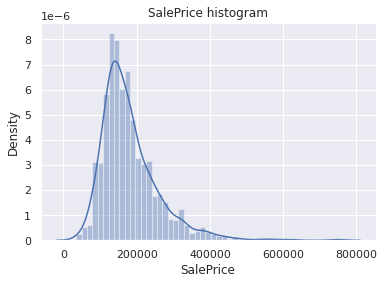

In [235]:
sns.distplot(df_train['SalePrice'])
plt.title('SalePrice histogram')

위 히스토그램을 통해 알 수 있는 것은 다음과 같다.
* 정규분포를 따르지 않는다.
* 오른쪽으로 꼬리가 긴 양의 왜도
* 첨도가 높다.

### 1) 수치형 변수와 관계(scatterplot)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


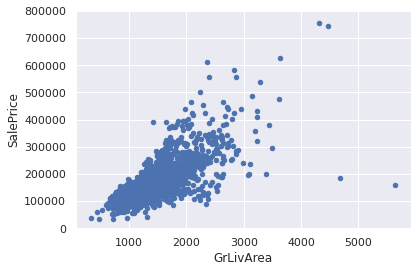

In [236]:
# GrLivArea/SalePrice scatterplot
var='GrLivArea'
data=pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

'GrLivArea'와 'SalePrice'는 선형관계이다. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


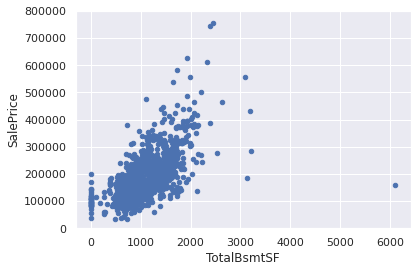

In [237]:
# TotalBsmtSF/SalePrice 산점도
var='TotalBsmtSF'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

TotalBsmtSF와 SalePrice는 강한 선형 관계를 갖는다.

### 2) 범주형 변수와 관계(boxplot)

(-0.5, 9.5, -1105.0, 791005.0)

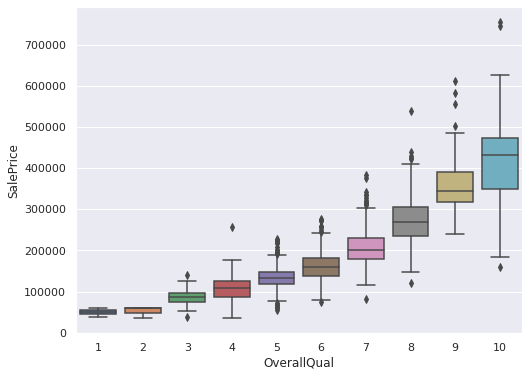

In [238]:
# OverallQual/SalePrice boxplot
var='OverallQual'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var, y='SalePrice',data=data)
fig.axis(ylim=(0,800000))

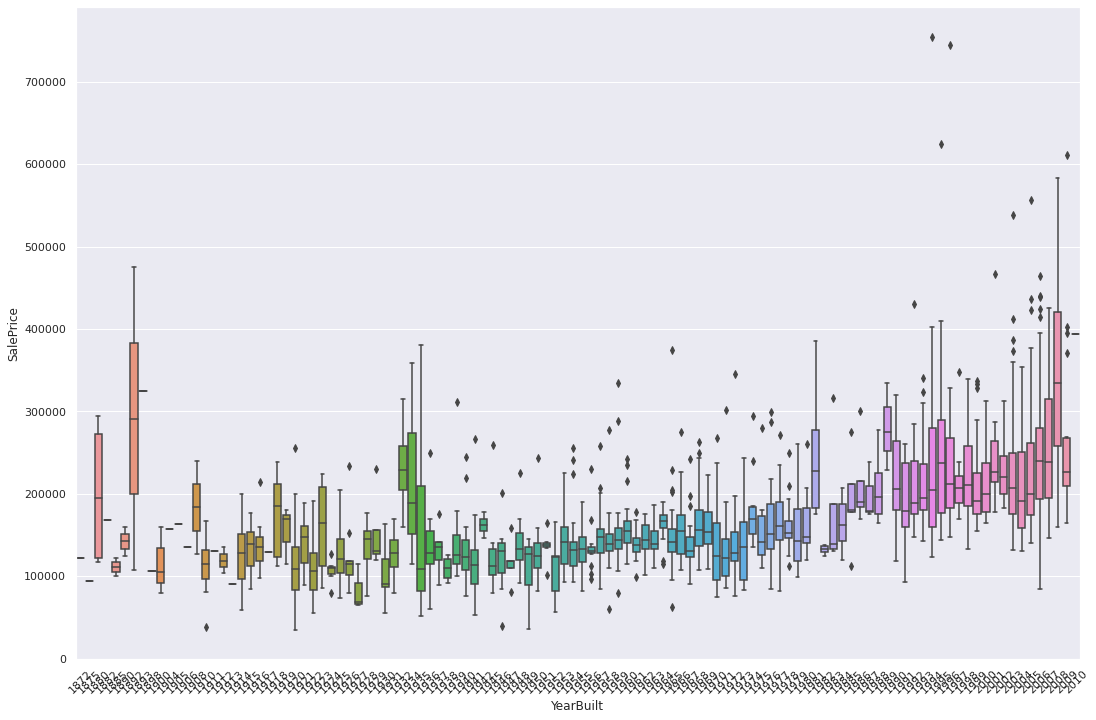

In [214]:
# YearBuilt/SalePrice boxplot
var='YearBuilt'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)

f,ax=plt.subplots(figsize=(18,12))
fig=sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ylim=(0,800000))
plt.xticks(rotation=45)
plt.show()

### 3) 요약

* 수치형 변수('GrLivArea','TotalBsmtSF')는 'SalePrice'와 선형관계 (양의 상관관계)를 보이며 특히 'TotalBsmtSF' 기울기가 높았다.  

* 범주형 변수('OverallQual','YearBuilt')는 'SalePrice'와 상관관게가 있는 것으로 보여지며 'OverallQual'의 경우 강한 상관관계 있는 것으로 보여진다. 

## 3.변수 선택(Feature Selection)
1. Corelation Matrix(heatmap)
2. 'SalePrice' Correlation matrix(Zoomed heatmap)
3. 가장 상관관계가 높은 변수 10개 산점도

### 1)Correlation Matrix(heatmap)

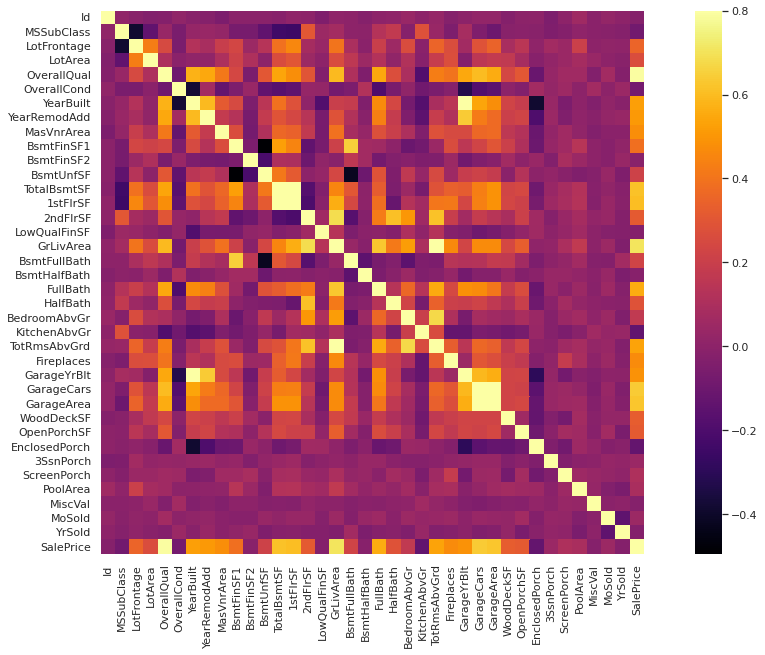

In [215]:
# 상관 행렬도(correlation matrix)
corrmat=df_train.corr()
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='inferno')

heatmap을 통해 변수별 상관관계 개요를 볼 수 있다.

### 2)'SalePrice' 상관 행렬도(Zoomed heatmap)

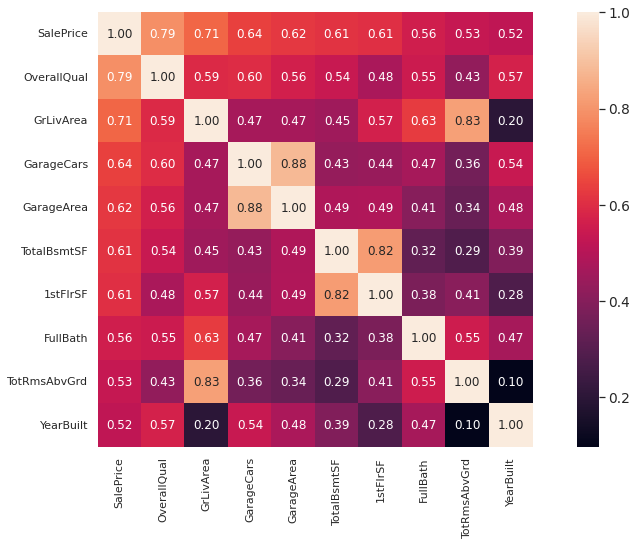

In [216]:
k=10
cols=corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm=np.corrcoef(df_train[cols].values.T)

plt.subplots(figsize=(16,8))
sns.set(font_scale=1.25)
hm=sns.heatmap(cm, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

 위 heatmap은 'SalePrice'와 상관계수가 높은 10개의 변수(nlargest(k=10))를 추린 것 이다. 이를 통해 알 수 있는 것은 다음과 같다.
 * 'GarageCars'와 'GarageArea'는 유사한 변수일 것이다. (유사성이 상대적으로 낮은 'GarageArea'는 제거)
 * 'TotalBsmtSF'와 '1stFloor'는 유사한 변수일 것이다. ('1stFloor'변수 제거)
 * 'YeaBuilt'는 'SalePrice'와 10개 변수 중 가장 낮은 상관관계를 보인다 (이는 시계열 분석일 필요해 보인다.)

### 3)가장 상관관계가 높은 변수간 상관 관계

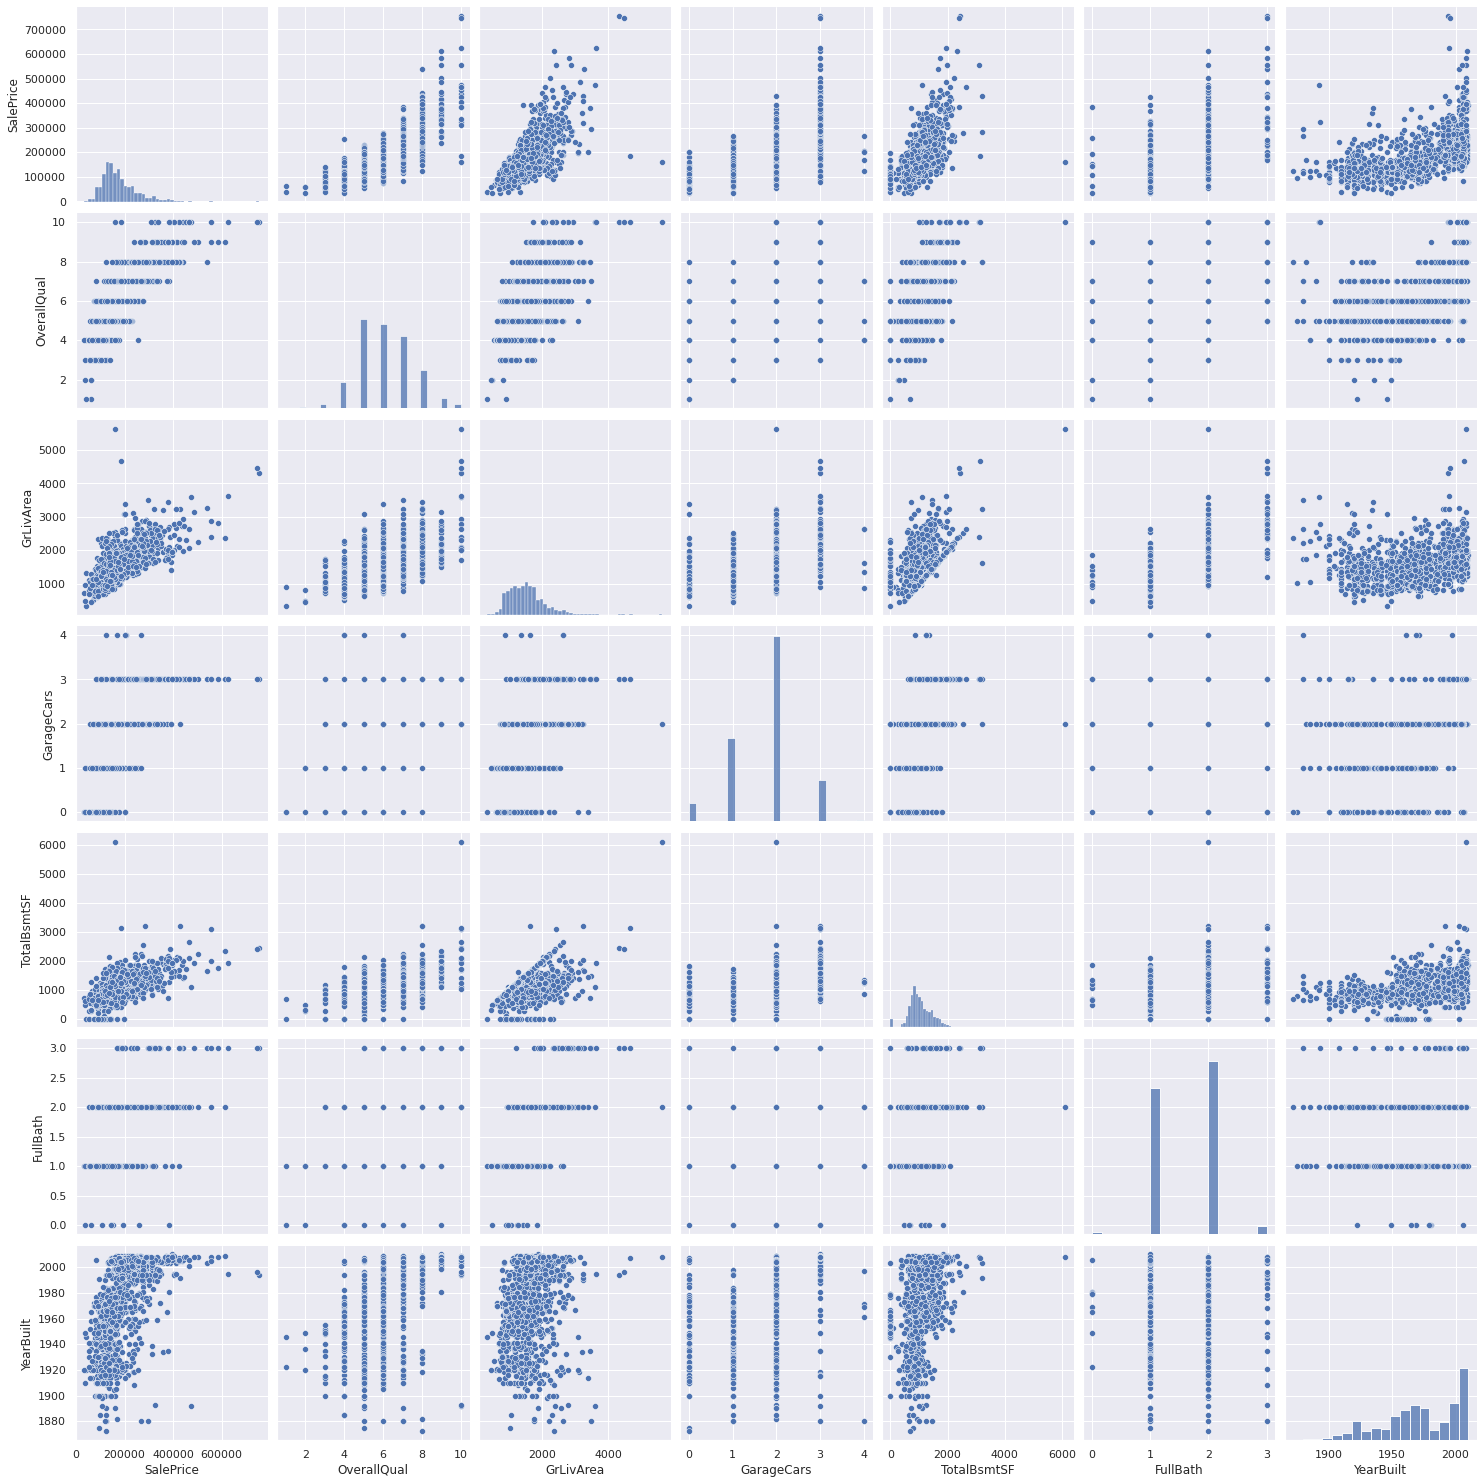

In [217]:
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols], size=3)
plt.show()

위 산점도에서 눈여겨 볼 점
 * 'TotalBsmtSF'와 'GrLivArea'사이 수치는 선형성을 보인다. 
 * 'SalePrice'와 'YearBuilt'는 지수적으로 증가하는 모양을 볼 수 있다.

## 4.결측치
**결측치를 볼 때 주의할 점**
 * 누락된 데이터의 분포가 얼마나 퍼져있는가?
 * 결측치의 분포가 무작위인가 패턴을 나타내는가?

In [218]:
total=df_train.isna().sum().sort_values(ascending=False)
percent=(df_train.isna().sum()/df_train.isna().count()).sort_values(ascending=False)

missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


**결측치 처리 방법**
* 결측치가 15%이상인 변수는 제거.
* 유사한 변수에 동일한 결측치가 있을 경우 종속변수와 상관관계 가장 높은 변수 제외하고 제거.
* 변수간 연관성이 너무 높을 경우 제거.
* 결측치가 적은 경우 해당 행만 제거.

In [219]:
# 결측치 전처리
df_train=df_train.drop((missing_data[missing_data['Total']>1]).index, 1)
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isna().sum().max()

0

## 5.이상치
'SalePrice'의 표준편차와 산점도 집합을 통해 간단한 분석 수행.

* 일변량 분석
* 다변량 분석

### 1) 일변량 분석
관측치를 이상치로 분류할 기준점 설정.  
(이를 위해 데이터 표준화 수행)

        표준화 : 평균이 0, 표준편차가 1이 되도록 변환

In [220]:
# 데이터 표준화
SalePrice_sc=StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])

low_range=SalePrice_sc[SalePrice_sc[:,0].argsort()][:10]
high_range=SalePrice_sc[SalePrice_sc[:,0].argsort()][10:]

print('outer range(low) of the distribution')
print(low_range)
print('outer range(high) of the distribution')
print(high_range)

outer range(low) of the distribution
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
outer range(high) of the distribution
[[-1.54113464]
 [-1.52225288]
 [-1.52225288]
 ...
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


**'SalePrice 표준화 후 알 수 있는 점**
* Low Range는 비슷하며 0에서 크게 벗어나지 않는다.
* High Ragne는 0에서 멀고 7에 가깝다. (몇몇 변수는 범위에서 멀리 벗어나있다.)

High range 값 중 7이상은 주의해야 한다.

### 2) 이변량 분석

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


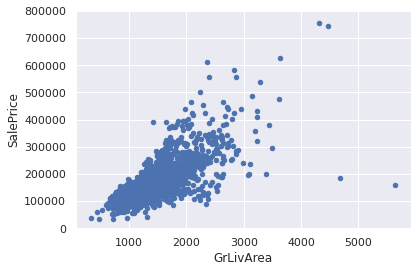

In [221]:
# SalePrice/GrLivArea
var='GrLivArea'
data=pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

* 두 가지 값은(GrLivArea > 4000, SalePrice < 200000) 경향을 따르지 않으니 제거.
* 두 가지 값은 (GrLivArea>4000, SalePrice>700000)은 값이 특히 크지만 경향성을 따르므로 유지.

In [222]:
# GrLivArea의 이상치 제거
df_train.sort_values(by='GrLivArea', ascending=False)[:2]
df_train=df_train.drop(df_train[df_train['Id']==1299].index)
df_train=df_train.drop(df_train[df_train['Id']==524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


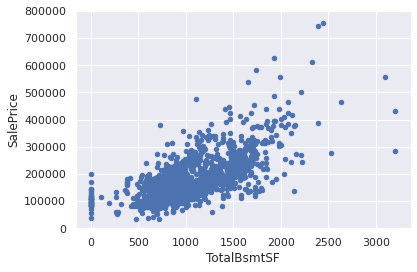

In [223]:
# TotalBsmtSF/GrLivArea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

이상치 제거하지 않음.

## 6.통계적 가정

**통계적 가정(4가지)**
 - 정규성/등분산성/선형성/상관 오류의 부재

 * **정규성(Normality)** 
         우리가 말하는 정규성이란 데이터가 정규분포를 따라야 하며 이는 여러 통계 검정이 이에 의존하기 때문에(예:t-통계량) 중요하다.
        이번 활동에서는 'SalePrice'에 대한 일변량 정규성을 점검할 것이다. (일변량 정규성은 다변량 정규성을 보장하지 않지만 도울수는 있다.)
        고려해야 할 또 다른 세부 사항은 큰 표본(>200 관측치)에서 정규성은 그러한 문제가 아니라는 것 이다.
         그러나 정규성을 해결하면 다른 많은 문제(예:이분산성)를 피할 수 있으므로 이러한 분석을 수행하는 주된 이유가 된다. 

* **등분산성(Homoscedasticity)**
        등분산성은 '종속 변수가 예측 변수 범위에서 동일한 수준의 분산을 보인다는 가정'을 의미한다.
        등분산성은 독립 변수의 모든 값에서 오차항이 동일하기 때문에 바람직하다.


* **선형성(Linearity)**
        선형성을 평가하는 가장 일반적인 방법은 산점도를 조사하고 선형 패턴을 검색하는 것이다.
        패턴이 선형이 아닌 경우 데이터 변환을 살펴보는 것이 좋다. 
        그러나 우리가 본 대부분의 산점도가 선형 관계를 갖는 것으로 보이기 때문에 이에 대해 다루지 않을 것이다. 

* **상관 오류의 부재(Absence of correlated errors )**
        정의에서 알 수 있듯이 상관 오류는 한 오류가 다른 오류와 상관관계가 있을 때 발생한다. 
        예를 들어 하나의 양의 오류가 체계적으로 음의 오류를 만든다면, 그것을 변수들 사이에 관계가 있는 것을 의미한다.
        이것을 일부 패턴이 시간과 관련된 시계열에서 자주 발생한다. 
        우리는 이것을 다루지 않지만 무언가 발견하면, 여러분이 얻고 있는 효과를 설명할 수 있는 변수를 추가해보자.
        이것이 상관 오류에 대한 일반적인 솔루션이다. 


### 1) 정규성 탐색 (Histogram, NormalProbability Plot)
 다음 사항에 유의해 작업을 수행하자.
 * **히스토그램(histogram)** - 첨도와 왜도(뾰족한 정도, 기울기 정도)
 * **정규확률그림(Normal Probabtility Plot)** - 데이터 분포는 정규분포를 나타내는 대각선을 밀접하게 따라야 한다.

#### a) SalePrice 변환 전/후

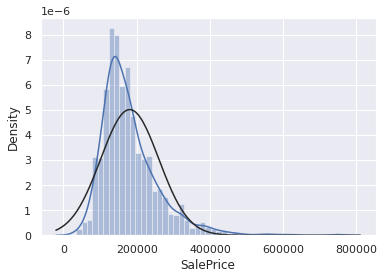

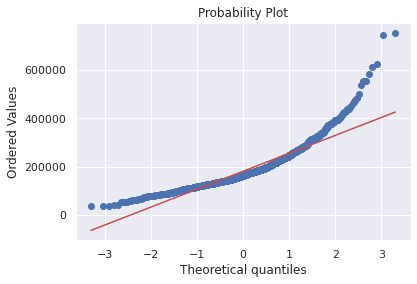

In [224]:
sns.distplot(df_train['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

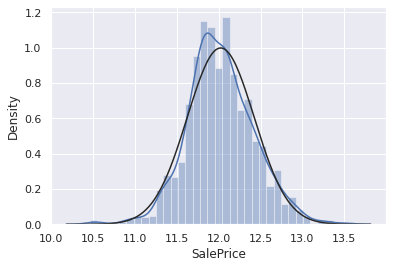

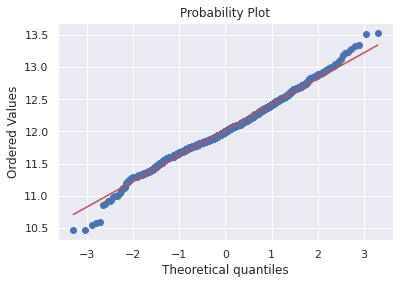

In [225]:
# 로그 변환
df_train['SalePrice']=np.log(df_train['SalePrice'])
# 변환된 'SalePrice' 히스토그램과 정규확률도
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

변환 전'salePrice'는 양의 왜도와 높은 첨도를 보이며 정규 분포 대각선을 따르지 않으나 로그 변환 후 정규 분포를 따른다.

#### b) GrLivArea 변환 전/후

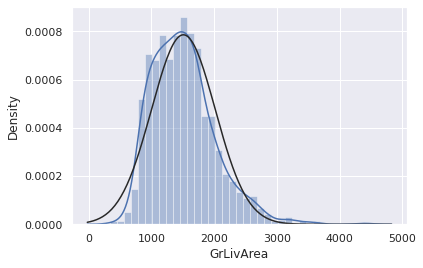

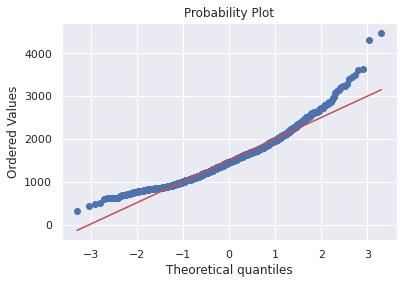

In [226]:
sns.distplot(df_train['GrLivArea'], fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'], plot=plt)

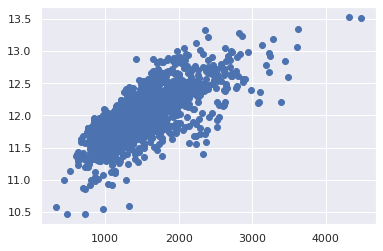

In [227]:
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])

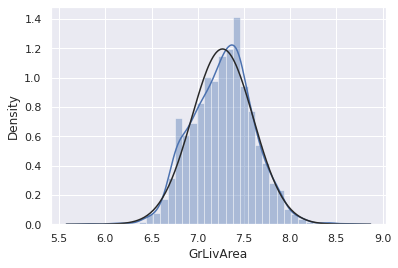

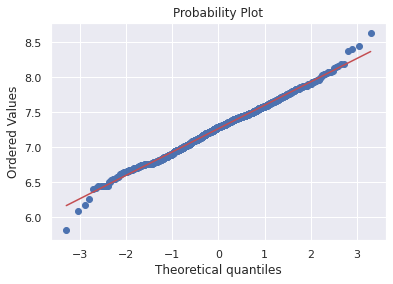

In [239]:
# 로그 변환 
df_train['GrLivArea']=np.log(df_train['GrLivArea'])
# 로그 변환 후 히스토그램, 정규확률도
sns.distplot(df_train['GrLivArea'], fit=norm)
res = stats.probplot(df_train['GrLivArea'], plot=plt)

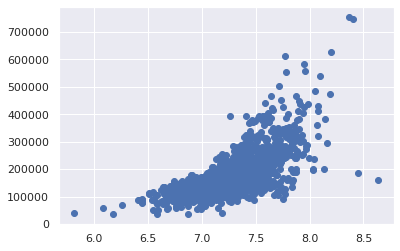

In [240]:
# scatter plot
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])

#### c) TotalBsmtSF 변환 전/후


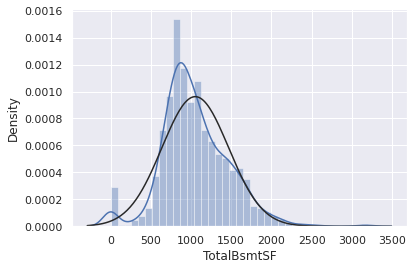

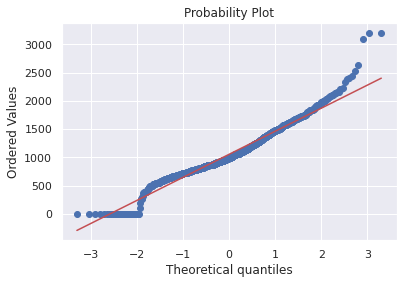

In [160]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['TotalBsmtSF'], plot=plt)

TotalBsmtSF 데이터가 나타내는 것.
 * 오른쪽으로 꼬리가 길다
 * 값이 0인 데이터 다수 존재  
    (0값은 로그 변환 불가능)

로그 변환하기 위해 지하실 유무를 이진 변수로 생성한다. 그 후 관측값이 0인 값은 무시하고 그 외 값에 대해 변환 수행

##### c-1.새로운 변수 생성 (HasBsmt)
'TotalBsmtSF'에서 0보다 큰 값은 1, 그 외 값을 0으로 하는 조건을 갖는 'HasBsmt'변수를 생성한다.  
이 변수는 'TotalBsmtSF'에서 0이 아닌 값들을 로그 변환하는데  조건으로 사용한다.

In [161]:
df_train['HasBsmt']=pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt']=0
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt']=1 # 0보다 큰 값은 1로 변환

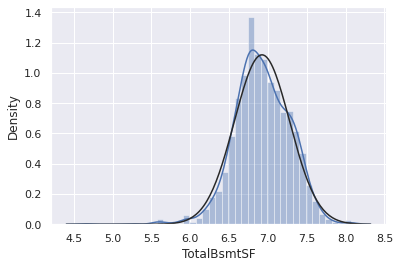

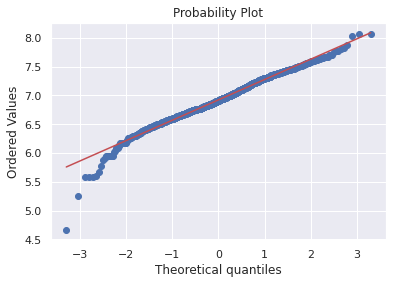

In [162]:
# HasBsmt 데이터 변환 (로그변환)
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF']=np.log(df_train['TotalBsmtSF']) # 변환되지 않은 값(!=0)은 NaN
# 변환된 HasBsmt 데이터 히스토그램, 정규확률도
sns.distplot(df_train[df_train['HasBsmt']>0]['TotalBsmtSF'], fit=norm)
fig=plt.figure()
res=stats.probplot(df_train[df_train['HasBsmt']>0]['TotalBsmtSF'], plot=plt)

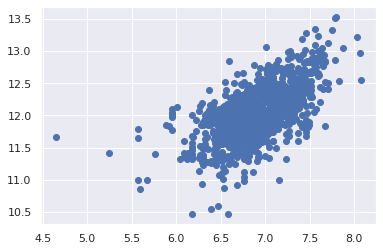

In [202]:
# scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

두 메트릭 변수에 대한 등분산성을 테스트 하는 최선의 방법은 그래픽을 사용하는 것이다. 등분산으로부터 이탈은 원뿔 또는 다이아몬드 같은 형태로 나타난다. 

* 원뿔형 - 그래프 한쪽에 작은 산포, 반대는 큰 산포
* 다이아몬드형 - 분포의 중심에 많은 점

## 8.더미변수

In [241]:
df_train=pd.get_dummies(df_train)

In [243]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,7.444249,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,7.140453,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,7.487734,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,7.448334,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,7.695303,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## 9.결론
커널을 통해 'SalePrice' 변수를 분석했으며 상관관계가 높은 상위 10개 변수에 대해 1)이상치와 결측치를 처리하고 기본적 2)통계 가정을 테스트하며 3)범주형 변수를 더미 변수로 변환하는 과정을 진행했다.   
'SalePrice' 예측에 있어서 선형 회귀, 앙상블 등 다양한 방법이 있으며 이 중 어떤 방식이 가장 적합한지에 대해 생각해보도록 하자.